## 工具变量

### 案例

**Does compulsory school attendance affect schooling and earnings?**
- Angrist and Krueger (1991)

Angrist and Krueger (1991) 使用1960、1970与1980年已部分公开的美国人口普查数据（Public Use Census Data），并开创性地将出生季度（quarter of birth）作为教育年限的工具变量。由于美国多数州的法律强制要求青少年在满16岁生日之前必须在校上学（compulsory schooling laws），而又要求儿童在入学那年的1月1日须满6周岁，这导致年初出生的儿童在入学时年龄比年末出生的儿童更大。因此，相比年末出生的学生，年初出生的学生在其受教育过程中，更早就达到了法定退学年龄（legal dropout age），这使得第1季度出生者所受教育平均而言低于第4季度出生者。


<img src="http://f.cl.ly/items/0R1Y15363l3b0j0h2Q07/Angrist1991p1.png" width="800" hegiht="600" align=center />

因此，出生季度与教育年限相关，满足相关性；另一方面，出生季度不太可能通过其他渠道影响工资，故满足外生性。为此，以第4季度为参照系，可使用第1季度、第2季度与第3季度的出生季度虚拟变量作为工具变量。考虑到季度效应在不同年份可能不同（参见上图），Angrist and Krueger (1991) 实际上使用 “出生年度虚拟变量”（year-of-birth dummies）与 “出生季度虚拟变量”（quarter-of-birth dummies）的交互项作为工具变量。

In [1]:
import ipystata

Terminated 1 unattached Stata session(s).


In [2]:
%%stata

clear

use "http://f.cl.ly/items/0F0V0s1V1E0E1h2y1H2C/NEW7080.dta"
rename v1 AGE
rename v2 AGEQ
rename v4 EDUC
rename v5 ENOCENT
rename v6 ESOCENT
rename v9 LWKLYWGE
rename v10 MARRIED
rename v11 MIDATL
rename v12 MT
rename v13 NEWENG
rename v16 CENSUS
rename v18 QOB
rename v19 RACE
rename v20 SMSA
rename v21 SOATL
rename v24 WNOCENT
rename v25 WSOCENT
rename v27 YOB
drop v8
gen COHORT=20.29
replace COHORT=30.39 if YOB<=39 & YOB >=30
replace COHORT=40.49 if YOB<=49 & YOB >=40
replace AGEQ=AGEQ-1900 if CENSUS==80
gen AGEQSQ= AGEQ*AGEQ

* replace with random number
*replace QOB = int(runiform(0,4)) + 1

** Generate YOB dummies **********
gen YR20=0  
replace YR20=1 if YOB==1920  
replace YR20=1 if YOB==30 
replace YR20=1 if YOB==40 
gen YR21=0  
replace YR21=1 if YOB==1921  
replace YR21=1 if YOB==31
replace YR21=1 if YOB==41 
gen YR22=0  
replace YR22=1 if YOB==1922  
replace YR22=1 if YOB==32 
replace YR22=1 if YOB==42 
gen YR23=0  
replace YR23=1 if YOB==1923 
replace YR23=1 if YOB==33 
replace YR23=1 if YOB==43 
gen YR24=0  
replace YR24=1 if YOB==1924  
replace YR24=1 if YOB==34 
replace YR24=1 if YOB==44 
gen YR25=0  
replace YR25=1 if YOB==1925  
replace YR25=1 if YOB==35 
replace YR25=1 if YOB==45 
gen YR26=0  
replace YR26=1 if YOB==1926  
replace YR26=1 if YOB==36 
replace YR26=1 if YOB==46 
gen YR27=0  
replace YR27=1 if YOB==1927  
replace YR27=1 if YOB==37 
replace YR27=1 if YOB==47 
gen YR28=0  
replace YR28=1 if YOB==1928  
replace YR28=1 if YOB==38 
replace YR28=1 if YOB==48 
gen YR29=0  
replace YR29=1 if YOB==1929  
replace YR29=1 if YOB==39 
replace YR29=1 if YOB==49 

** Generate QOB dummies ***********
gen QTR1=0
replace QTR1=1 if QOB==1
gen QTR2=0
replace QTR2=1 if QOB==2
gen QTR3=0
replace QTR3=1 if QOB==3
gen QTR4=0
replace QTR4=1 if QOB==4

** Generate YOB*QOB dummies ********
gen QTR120= QTR1*YR20
gen QTR121= QTR1*YR21
gen QTR122= QTR1*YR22
gen QTR123= QTR1*YR23
gen QTR124= QTR1*YR24
gen QTR125= QTR1*YR25
gen QTR126= QTR1*YR26
gen QTR127= QTR1*YR27
gen QTR128= QTR1*YR28
gen QTR129= QTR1*YR29

gen QTR220= QTR2*YR20
gen QTR221= QTR2*YR21
gen QTR222= QTR2*YR22
gen QTR223= QTR2*YR23
gen QTR224= QTR2*YR24
gen QTR225= QTR2*YR25
gen QTR226= QTR2*YR26
gen QTR227= QTR2*YR27
gen QTR228= QTR2*YR28
gen QTR229= QTR2*YR29

gen QTR320= QTR3*YR20
gen QTR321= QTR3*YR21
gen QTR322= QTR3*YR22
gen QTR323= QTR3*YR23
gen QTR324= QTR3*YR24
gen QTR325= QTR3*YR25
gen QTR326= QTR3*YR26
gen QTR327= QTR3*YR27
gen QTR328= QTR3*YR28
gen QTR329= QTR3*YR29

keep if COHORT>30.00 & COHORT <30.40


(329,509 real changes made)

(486,926 real changes made)

(816,435 real changes made)

(23,725 real changes made)

(33,602 real changes made)

(38,218 real changes made)

(24,978 real changes made)

(30,583 real changes made)

(38,387 real changes made)

(24,264 real changes made)

(32,211 real changes made)

(45,018 real changes made)

(24,345 real changes made)

(30,751 real changes made)

(46,349 real changes made)

(25,548 real changes made)

(31,916 real changes made)

(44,387 real changes made)

(24,834 real changes made)

(32,773 real changes made)

(44,546 real changes made)

(24,431 real changes made)

(32,676 real changes made)

(54,122 real changes made)

(25,650 real changes made)

(33,969 real changes made)

(60,788 real changes made)

(24,614 real changes made)

(35,223 real changes made)

(57,692 real changes made)

(24,810 real changes made)

(35,805 real changes made)

(57,419 real changes made)

(262,019 real changes made)

(255,733 real changes made)

(280,749 real 

In [3]:
%%stata

** Col 1 3 5 7 ***
*reg  LWKLYWGE EDUC  YR20-YR28 
*reg  LWKLYWGE EDUC  YR20-YR28 AGEQ AGEQSQ 
*reg  LWKLYWGE EDUC  RACE MARRIED SMSA NEWENG MIDATL ENOCENT WNOCENT SOATL ESOCENT WSOCENT MT YR20-YR28  
reg  LWKLYWGE EDUC RACE MARRIED SMSA NEWENG MIDATL ENOCENT WNOCENT SOATL ESOCENT WSOCENT MT YR20-YR28 AGEQ AGEQSQ 


      Source |       SS           df       MS      Number of obs   =   329,509
-------------+----------------------------------   F(23, 329485)   =   2831.65
       Model |   25059.716        23  1089.55287   Prob > F        =    0.0000
    Residual |  126778.155   329,485  .384776711   R-squared       =    0.1650
-------------+----------------------------------   Adj R-squared   =    0.1650
       Total |  151837.871   329,508  .460801773   Root MSE        =     .6203

------------------------------------------------------------------------------
    LWKLYWGE |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        EDUC |   .0632378   .0003393   186.37   0.000     .0625728    .0639028
        RACE |  -.2574534   .0040414   -63.70   0.000    -.2653745   -.2495323
     MARRIED |   .2478785   .0031666    78.28   0.000     .2416721    .2540849
        SMSA |  -.1762903   .0028655   -61.52   0.

In [4]:
%%stata

** Col 2 4 6 8 ***
*ivregress 2sls LWKLYWGE YR20-YR28 (EDUC = QTR120-QTR129 QTR220-QTR229 QTR320-QTR329 YR20-YR28)
*ivregress 2sls LWKLYWGE YR20-YR28 AGEQ AGEQSQ (EDUC = QTR120-QTR129 QTR220-QTR229 QTR320-QTR329 YR20-YR28)
*ivregress 2sls LWKLYWGE YR20-YR28 RACE MARRIED SMSA NEWENG MIDATL ENOCENT WNOCENT SOATL ESOCENT WSOCENT MT  (EDUC = QTR120-QTR129 QTR220-QTR229 QTR320-QTR329 YR20-YR28)
ivregress 2sls LWKLYWGE YR20-YR28 RACE MARRIED SMSA NEWENG MIDATL ENOCENT WNOCENT SOATL ESOCENT WSOCENT MT AGEQ AGEQSQ (EDUC = QTR120-QTR129 QTR220-QTR229 QTR320-QTR329),first
estat first

note: QTR327 dropped due to collinearity
note: QTR329 dropped due to collinearity

First-stage regressions
-----------------------

                                                Number of obs     =    329,509
                                                F(  50, 329458)   =     406.35
                                                Prob > F          =     0.0000
                                                R-squared         =     0.0581
                                                Adj R-squared     =     0.0579
                                                Root MSE          =     3.1848

------------------------------------------------------------------------------
        EDUC |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        YR20 |   -5.20664   4.294373    -1.21   0.225    -13.62349    3.210207
        YR21 |  -3.769296   3.305904    -1.14   0.254    -10.24877    2.71018


  1. 
  2. 
  3. 
  4. 
  5. 
  6. 
  7. 
  8. 
  9. 
 10. 

      command:  sim_2sls
         beta:  r(b)

Simulations (1000)
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5 



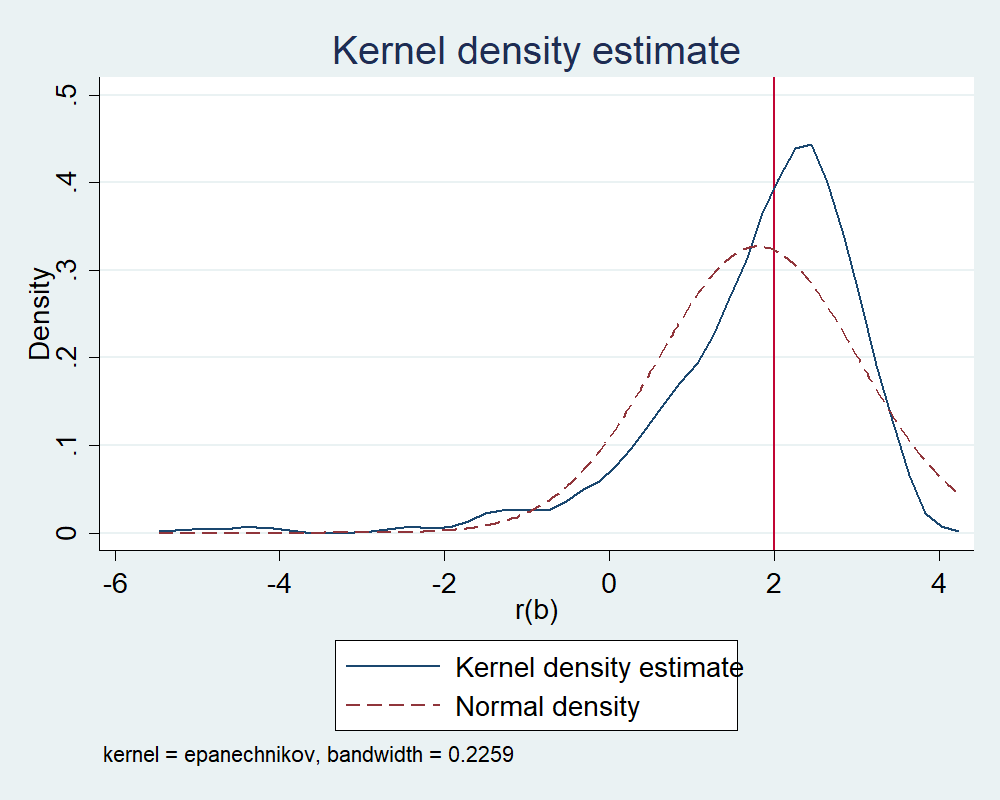

In [5]:
%%stata

* 如果已有名为 “sim_2sls” 的程序，则去掉；反之，不执行下一行语句
capture program drop sim_2sls  

* 定义称为 “sim_2sls” 的程序
program sim_2sls, rclass

* 删除内存中的所有数据   
drop _all   

* 设定样本容量为10,000
set obs 10000  

* 生成服从标准正态的扰动项 u
gen u = rnormal()  

* 生成服从标准正态的工具变量 z，且与扰动项 u 不相关
gen z = rnormal()  

* 生成服从标准正态的随机变量 v

gen v = rnormal()  

* 生成内生变量 x，与工具变量 z 及扰动项 u 都相关
*gen x = 0.5*z + 0.2*u + 0.1*v   
gen x = 0.01*z + 0.2*u + 0.1*v 

* 生成被解释变量 y，其中 x 的真实系数为 2
gen y = 1 + 2*x + u

* 以 z 为工具变量，将  y 对 x 进行 2SLS 估计
ivregress 2sls y (x = z)

* 记 x 的估计系数为 b
return scalar b=_b[x]

* 程序 “sim_2SLS” 结束
end


* 运行程序 “sim_2SLS” 1000 遍，得到 1000 个 2SLS 估计值 b
simulate beta = r(b), seed(10101) reps(1000): sim_2sls

* 画这 1000 个 2SLS 估计值 b 的核密度图（相当于光滑的直方图）
kdensity beta, xline(2) normal normopts(lp(dash))